In [ ]:
dataset_dir = '/content/drive/MyDrive/ImageClassification/Dataset_npy'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
# Function to generate image pairs
def generate_image_pairs(images, labels):
    # Generate index for each label
    unique_labels = np.unique(labels)
    label_wise_indices = dict()
    for label in unique_labels:
        label_wise_indices.setdefault(label,
                                      [index for index, curr_label in enumerate(labels) if
                                       label == curr_label])

    # Generate image pairs and labels
    pair_images = []
    pair_labels = []
    for index, image in enumerate(images):
        pos_indices = label_wise_indices.get(labels[index])
        pos_image = images[np.random.choice(pos_indices)]
        pair_images.append((image, pos_image))
        pair_labels.append(1)

        neg_indices = np.where(labels != labels[index])
        neg_image = images[np.random.choice(neg_indices[0])]
        pair_images.append((image, neg_image))
        pair_labels.append(0)

    return np.array(pair_images), np.array(pair_labels)

In [ ]:
# Get the data directory paths
faces = 'olivetti_faces.npy'
faces_targets = 'olivetti_faces_target.npy'

In [ ]:
# Get the data directory paths
faces = dataset_dir+'/projectmembers_faces.npy'
faces_targets = dataset_dir+'/projectmembers_faces_target.npy'

In [ ]:
# Load the images and labels
face_images = np.load(faces)
face_labels = np.load(faces_targets)

In [ ]:
face_labels.shape

(188,)

In [ ]:
face_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.where(face_labels == 0)

(array([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]),)

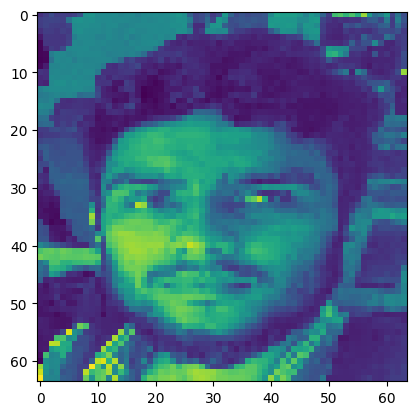

In [ ]:
plt.imshow(face_images[16])

In [ ]:
target_shape = face_images[0].shape

In [ ]:
target_shape

(64, 64)

In [ ]:
face_images.shape

(188, 64, 64)

In [ ]:
face_images[0].shape

(64, 64)

In [ ]:
images_dataset, labels_dataset = generate_image_pairs(face_images, face_labels)
images_dataset, labels_dataset = shuffle(images_dataset, labels_dataset)

In [ ]:
labels_dataset.shape

(376,)

In [ ]:
images_dataset.shape

(376, 2, 64, 64)

1

<Figure size 640x480 with 0 Axes>

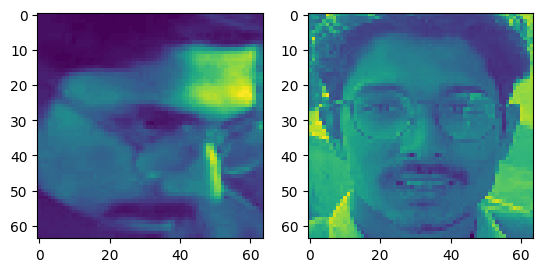

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2)

index = 375

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(images_dataset[index][0])
axarr[1].imshow(images_dataset[index][1])

labels_dataset[index]

In [ ]:
def visualize(image_pairs, labels, n = 5, title = "Image Pair Examples"):
    """ Visualize a few pairs """

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))
    plt.title(title)
    axs = fig.subplots(n, 2)
    for i in range(n):
        #print(image_pairs[i][0].shape)
        show(axs[i, 0], image_pairs[i][0])
        show(axs[i, 1], image_pairs[i][1])

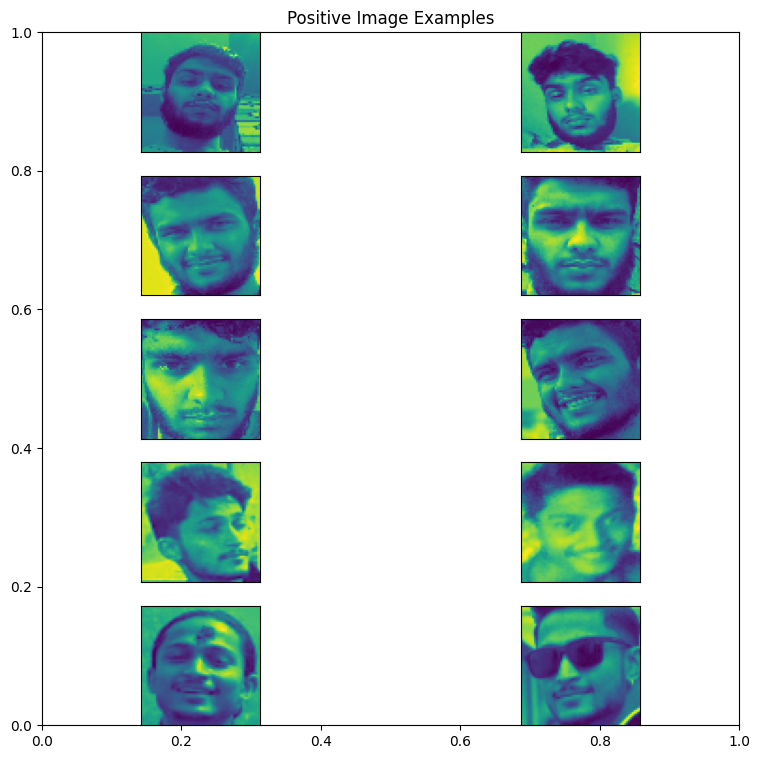

In [ ]:
# Visualize Positive Images
n = 5
indices = np.where(labels_dataset == 1)[:n]
visualize(images_dataset[indices], labels_dataset[indices],
          title = "Positive Image Examples")

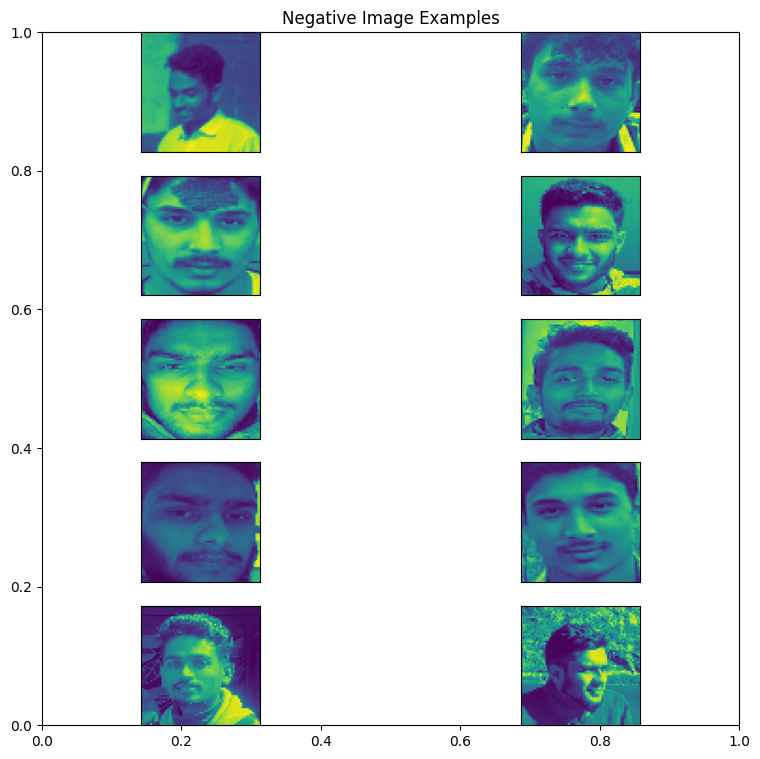

In [ ]:
# Visualize Negative Images
n = 5
indices = np.where(labels_dataset == 0)[:n]
#print(indices)
visualize(images_dataset[indices], labels_dataset[indices],
          title = "Negative Image Examples")

In [ ]:
inputs = layers.Input((64, 64, 1))

x = layers.Conv2D(64, (10, 10), padding="same", activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (7, 7), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (4, 4), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(256, (4, 4), padding="same", activation="relu")(x)
fcOutput = layers.Flatten()(x)
fcOutput = layers.Dense(4096, activation = "relu")(fcOutput)
outputs = layers.Dense(1024, activation = "sigmoid")(fcOutput)

embedding = Model(inputs, outputs, name = "Embedding")

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
# Define the Contrastive Loss
def contrastive_loss(y, preds, margin=1):
    y = tf.cast(y, preds.dtype)
    squaredPreds = K.square(preds)
    squaredMargin = K.square(K.maximum(margin - preds, 0))
    loss = K.mean(y * squaredPreds + (1 - y) * squaredMargin)

    return loss

In [ ]:
# Distance Layer
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance
    between the embeddings
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, compare):
        sum_squared = K.sum(K.square(anchor - compare), axis=1, keepdims=True)
        return K.sqrt(K.maximum(sum_squared, K.epsilon()))

In [ ]:
target_shape + (1,)

(64, 64, 1)

In [ ]:
anchor_input = layers.Input(name="anchor", shape=target_shape + (1,))
compare_input = layers.Input(name="compare", shape=target_shape + (1,))

distances = DistanceLayer()(
    embedding(anchor_input),
    embedding(compare_input),
)

outputs = layers.Dense(1, activation = "sigmoid") (distances)

siamese_model = Model(
    inputs=[anchor_input, compare_input], outputs=outputs
)

In [ ]:
images_dataset[:, 0, :].shape,images_dataset[:, 0, :].shape

((376, 64, 64), (376, 64, 64))

In [ ]:
images_dataset[0,0,:].shape

(64, 64)

1

<Figure size 640x480 with 0 Axes>

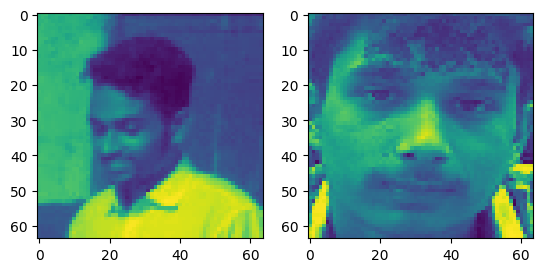

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2)

index = 375

axarr[0].imshow(images_dataset[0,0,:])
axarr[1].imshow(images_dataset[0,1,:])

labels_dataset[index]

0

<Figure size 640x480 with 0 Axes>

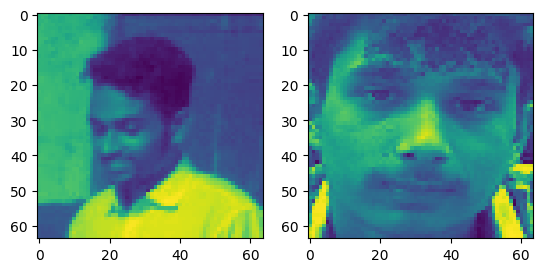

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2)

index = 0

axarr[0].imshow(images_dataset[index][0])
axarr[1].imshow(images_dataset[index][1])

labels_dataset[index]

In [ ]:
siamese_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = siamese_model.fit([images_dataset[:, 0, :], images_dataset[:, 1, :]], labels_dataset,
                            epochs=50, validation_split = 0.2, batch_size = 64)

Epoch 1/50
5/5 [==============================] - 82s 16s/step - loss: 0.6951 - accuracy: 0.5133 - val_loss: 0.6934 - val_accuracy: 0.4342
Epoch 2/50
5/5 [==============================] - 78s 16s/step - loss: 0.6937 - accuracy: 0.5133 - val_loss: 0.6939 - val_accuracy: 0.4342
Epoch 3/50
5/5 [==============================] - 81s 16s/step - loss: 0.6934 - accuracy: 0.5133 - val_loss: 0.6934 - val_accuracy: 0.4211
Epoch 4/50
5/5 [==============================] - 76s 15s/step - loss: 0.6936 - accuracy: 0.5133 - val_loss: 0.6936 - val_accuracy: 0.4342
Epoch 5/50
5/5 [==============================] - 76s 15s/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6936 - val_accuracy: 0.4211
Epoch 6/50
5/5 [==============================] - 79s 16s/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6946 - val_accuracy: 0.4079
Epoch 7/50
5/5 [==============================] - 76s 15s/step - loss: 0.6911 - accuracy: 0.5133 - val_loss: 0.7020 - val_accuracy: 0.4079
Epoch 8/50
5/5 [===========

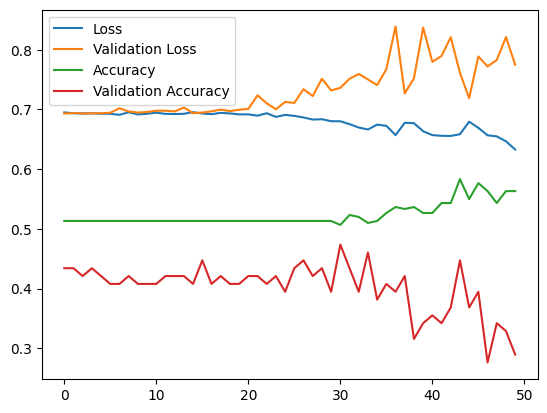

In [ ]:
# Training Plot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Loss", "Validation Loss", "Accuracy", "Validation Accuracy"])

In [ ]:
def test_visualize(images, n = 4):
    """ Visualize a few images """

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))
    axs = fig.subplots(1, n)
    for i in range(n):
        show(axs[i], images[i])

Test 1

In [ ]:
test_indices = [0, 1, 2, 3, 4]
test_index = random.sample(range(10), 1)[0]
test_image = face_images[test_index]

compare_images = []
for i in range(5):
    index = random.sample(range(i * 10, (i + 1) * 10), 1)[0]
    image = face_images[index]
    compare_images.append(image)

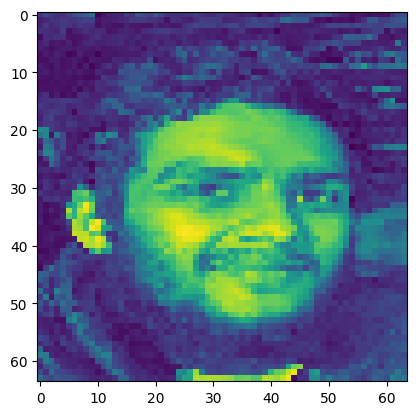

In [ ]:
plt.imshow(test_image)

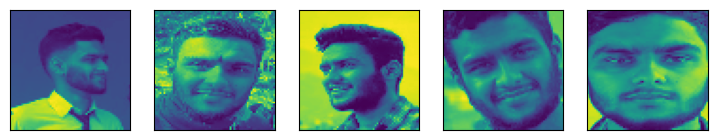

In [ ]:
test_visualize(compare_images)

In [ ]:
image_pairs = []

for image in compare_images:
    image_pairs.append((test_image, image))

image_pairs = np.array(image_pairs)

In [ ]:
score = siamese_model.predict([image_pairs[:, 0, :], image_pairs[:, 1, :]])

1/1 [==============================] - 0s 382ms/step


In [ ]:
print(score)

[[0.00993034]
 [0.68972313]
 [0.68763626]
 [0.6852111 ]
 [0.00395602]]


Test 2

In [ ]:
test_indices = [(0,59),(60,105),(106,157),(158,187)]
test_index = random.sample(range(1, 188), 1)[0]
print(test_index)
test_image = face_images[test_index]

compare_images = []
for i in range(4):
    #index = random.sample(range(i * 10, (i + 1) * 10), 1)[0]
    index = random.sample(range(test_indices[i][0],test_indices[i][1]), 1)[0]
    print(index)
    image = face_images[index]
    compare_images.append(image)

11
52
68
115
182


In [ ]:
print(index)

182


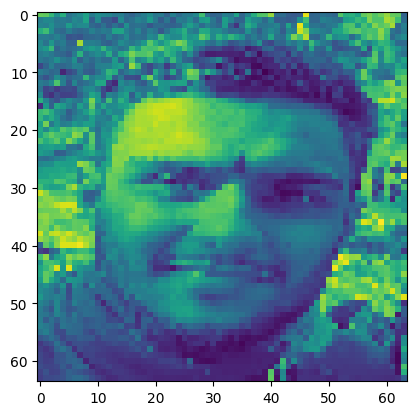

In [ ]:
plt.imshow(test_image)

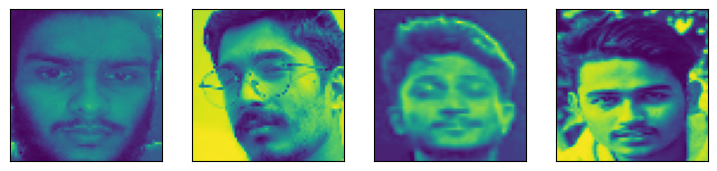

In [ ]:
test_visualize(compare_images)

In [ ]:
image_pairs = []

for image in compare_images:
    image_pairs.append((test_image, image))

image_pairs = np.array(image_pairs)

In [ ]:
score = siamese_model.predict([image_pairs[:, 0, :], image_pairs[:, 1, :]])
score

1/1 [==============================] - 0s 290ms/step


array([[0.67145073],
       [0.49104908],
       [0.5467641 ],
       [0.7596391 ]], dtype=float32)

In [ ]:
img = cv2.imread('mee.jpg',cv2.IMREAD_GRAYSCALE)  # reading that image as array
img = cv2.resize(img, (64, 64))
print(img.shape)  # will get the image as an array
test_image = img
type(test_image)

(64, 64)


numpy.ndarray

In [ ]:
siamese_model.save(dataset_dir+'/trained_150epoch')